In [2]:
from gtda import *

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels as stm
import math

import sklearn
from sklearn.manifold import TSNE
import umap.umap_ as umap
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go
import sys

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib
from sklearn.metrics import roc_curve, auc

In [25]:
#Funzione per la lettura del  datset e dei tipi delle variabili
def read_csv(path):
    # Leggo il tipo della variabile dalla prima linea del file csv
    dtypes = pd.read_csv(path, nrows=1).iloc[0].to_dict()
    # Leggo il resto delle righe contenenti i diversi dati
    return pd.read_csv(path, dtype=dtypes, skiprows=[1])

#Funzione che mi permette di andare a generare i classificatori e calcolarne le prestazioni
def print_decision_boundary(names,h, lens, X, y):
    """
    INPUT:
    - names: nome dei classificatori che si vogliono considerare
    - lens: metodo con cui si vuole ridurre la dimensione del dataset
    - X: dataset
    - y: classificazione degli esempi
    """
    classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    sklearn.linear_model.LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    sklearn.ensemble.GradientBoostingClassifier(),
    sklearn.discriminant_analysis.LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]
    figure = plt.figure(figsize=(20, 20))
    i = 1

    # Pre-processing del dataset, divisione in training set e test set
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Creazopme della mesh su cui si andranno a visualizzare i decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot del dataset precedenemente ridotto di dimensione
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])

    # Itero su tutti i classificatori
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(5, 2, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot del decisione boundary e assegnazione del colore ad ogni punto della mesh in [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Coloro il grafico
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot dei punti di traning
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot dei punti di test 
        ax.scatter(X_test[:, 0],X_test[:, 1],c=y_test,cmap=cm_bright,edgecolors="k",alpha=0.6,)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        i += 1

    plt.tight_layout()
    plt.show()
    
def evaluation_model(db, names):
    """
    Funzione che permette di ottenere gli indici di perfomance di ogni classificatore
    INPUT:
    - db: dataframe contenente i dati X e la classificazione Y
    - names: il nome dei classificatori che si vogliono confrontare
    """
    classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    sklearn.linear_model.LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    sklearn.ensemble.GradientBoostingClassifier(),
    sklearn.discriminant_analysis.LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]
 
    X_train, X_test, y_train, y_test = train_test_split(db.values, target, test_size=0.3, random_state=42)
    Classificatori = pd.DataFrame(columns = ["Classificatore", "Accuratezza"])
    # iterate over classifiers
    i = 0
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        Classificatori.at[i,"Classificatore"] = name
        Classificatori.at[i,"Accuratezza"] = score
        Classificatori.at[i,"F_score"] = sklearn.metrics.f1_score(y_test,clf.predict(X_test))
        Classificatori.at[i,"Precision"] = sklearn.metrics.precision_score(y_test,clf.predict(X_test))
        Classificatori.at[i,"Recall"] = sklearn.metrics.recall_score(y_test,clf.predict(X_test))
        Classificatori.at[i,"AUC"] = sklearn.metrics.roc_auc_score(y_test,clf.predict(X_test))
        cm = sklearn.metrics.confusion_matrix(y_test,clf.predict(X_test))
        Classificatori.at[i,"Sens"] = cm[0,0]/(cm[0,0]+cm[1,0])
        Classificatori.at[i,"Spec"] = cm[1,1]/(cm[0,1]+cm[1,1])
        Classificatori.at[i,"PPV"] = cm[0,0]/(cm[0,0]+cm[0,1])
        Classificatori.at[i,"NPV"] = cm[1,1]/(cm[1,0]+cm[1,1])
        i = i+1
        if name == "QDA":
            y_pred_base = clf.predict(X_test)
        
    #Salvo il dataframe contenente i risulati in "ModelliBase"
    return Classificatori   

In [5]:
#Carico la matrice di similarità Gower ricavata dal dataset
X2 = pd.read_csv("C:/Users/Antonio Montanaro/Desktop/Tesi Magistrale/File Memory/GowerMatrix.csv", header=None)

#Carico il dataset e classe
db = read_csv("C:/Users/Antonio Montanaro/Desktop/Tesi Magistrale/File Memory/datasetFinale_Imputato.csv")
target = pd.read_csv("C:/Users/Antonio Montanaro/Desktop/Tesi Magistrale/File Memory/Class.csv", header = None)

#Carico la lista dei pazienti analizzati in questo studio 
id_paz =  pd.read_csv("C:/Users/Antonio Montanaro/Desktop/Tesi Magistrale/File Memory/id_paz.csv")
id_paz = id_paz.drop(0)
id_paz["ID PAZIENTE"] = id_paz["ID PAZIENTE"].apply(pd.to_numeric)

In [6]:
#Carico l'informazione sui farmaci
db_farmaci =  pd.read_csv("C:/Users/Antonio Montanaro/Desktop/Tesi Magistrale/File Memory/dataset_Farmaci.csv")
del db_farmaci["Unnamed: 0"]
db_farmaci = db_farmaci.loc[db_farmaci["ID PAZIENTE"].isin(id_paz["ID PAZIENTE"])]
db_ipertensione = pd.DataFrame()
db_ipertensione["ID_PAZ"] = db_farmaci["ID PAZIENTE"]
db_ipertensione["ipertensione"] = db_farmaci["Il paziente è attualmente in trattamento con farmaci antiipertensivi?"]

In [7]:
#Modifico la colonna ipertensione poichè servirà successivamente
db["ID"] = id_paz["ID PAZIENTE"]
val_ipert = []
for i, row in db.iterrows():
    value = db_ipertensione.loc[db_ipertensione["ID_PAZ"] == row["ID"]]
    value = value.dropna()
    if len(value) == 0:
        val_ipert.append('NO')
    else:
        val_ipert.append(value.iloc[0]["ipertensione"])

del db["ID"]       
db["Trattamento Ipertensione"] = val_ipert    

In [8]:
# Implemento il modello di regressione del Progetto cuore
#Vado a rendere binarie le colonne categoriche prese come regressori
db["Il paziente è un fumatore?"] = db["Il paziente è un fumatore?"].apply(lambda x: '0' if x =='0' else '1') #I casi che rientrano nell'else sono sia i fumatori che gli ex fumatori
# db['Il paziente soffre di diabete mellito?'] assume i valori 0 (no) e 1  (si)
# db['Sesso'] 0 maschio, 1 femmina

patient_coef = pd.DataFrame(columns=["Paziente","Sesso", "S(t)","regr_età","regr_fumo","regr_diabete","regr_sistolico","regr_col", "regr_colHDL","regr_iper", "G(u)"])
for i, row_value in db.iterrows():
    patient_coef.at[i,"Paziente"] = i
    patient_coef.at[i,"Sesso"] = row_value["Sesso"]
    
    if row_value["Sesso"] == '0':
        patient_coef.at[i,"regr_età"] = row_value["Età"]*0.076
        patient_coef.at[i,"S(t)"] = 0.953
        patient_coef.at[i,"G(u)"] = 6.583
        if row_value["Il paziente è un fumatore?"]== '0':
             patient_coef.at[i,"regr_fumo"] = 0
        else:
             patient_coef.at[i,"regr_fumo"] = 0.508
        
        if row_value['Il paziente soffre di diabete mellito?']== 0:     
            patient_coef.at[i,'regr_diabete'] = 0
        else:
            patient_coef.at[i,'regr_diabete'] =0.462
        
        patient_coef.at[i,'regr_sistolico'] = row_value['Pressione arteriosa sistolica ']*0.013
        patient_coef.at[i,'regr_col'] = row_value['Colesterolo totale ']*0.006
        patient_coef.at[i,'regr_colHDL'] = row_value['Colesterolo HDL ']*(-0.013)
        
        if row_value['Trattamento Ipertensione']== 'NO':     
            patient_coef.at[i,'regr_iper']  = 0.49
        else:
            patient_coef.at[i,'regr_iper']  = 0
        

    else:
        patient_coef.at[i,"regr_età"] = row_value["Età"]*0.079
        patient_coef.at[i,"S(t)"] = 0.989
        patient_coef.at[i,"G(u)"] = 6.016
        if row_value["Il paziente è un fumatore?"]== '0':
             patient_coef.at[i,"regr_fumo"] = 0
        else:
             patient_coef.at[i,"regr_fumo"] = 0.773
        
        if row_value['Il paziente soffre di diabete mellito?']== 0:     
            patient_coef.at[i,'regr_diabete'] = 0
        else:
            patient_coef.at[i,'regr_diabete'] =0.339
        
        patient_coef.at[i,'regr_sistolico'] = row_value['Pressione arteriosa sistolica ']*0.016
        patient_coef.at[i,'regr_col'] = row_value['Colesterolo totale ']*0.003
        patient_coef.at[i,'regr_colHDL'] = row_value['Colesterolo HDL ']*(-0.015)
        
        if row_value['Trattamento Ipertensione']== 'NO':     
            patient_coef.at[i,'regr_iper']  = 0.59
        else:
            patient_coef.at[i,'regr_iper']  = 0

#A questo punto calcolo i punteggi di regressione per ogni paziente
for i, row_value in patient_coef.iterrows():
    risk_score = 1 - math.pow(row_value["S(t)"],(math.exp(row_value["regr_età"]+row_value["regr_sistolico"]+row_value["regr_col"]+row_value["regr_colHDL"]+row_value["regr_fumo"]+ row_value["regr_diabete"]+ row_value["regr_iper"]-row_value["G(u)"])))
    patient_coef.at[i,'Risk_score'] = risk_score
    
patient_coef['Risk_score'].to_csv("C:/Users/Antonio Montanaro/Desktop/Tesi Magistrale/Risk_score.csv")

Text(0, 0.5, 'Frequenza')

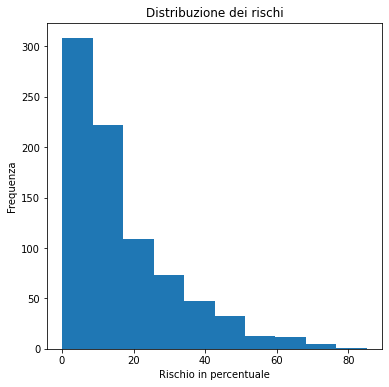

In [9]:
#Grafico la distribuzione dei punteggi di rischi calcolati sopra 
plt.figure(figsize=(6, 6))
plt.hist(patient_coef['Risk_score']*100)
plt.title("Distribuzione dei rischi")
plt.xlabel("Rischio in percentuale")
plt.ylabel("Frequenza")

Best alpha using built-in LassoCV: 0.152886
Best score using built-in LassoCV: 0.185410
Lasso picked 14 variables and eliminated the other 64 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

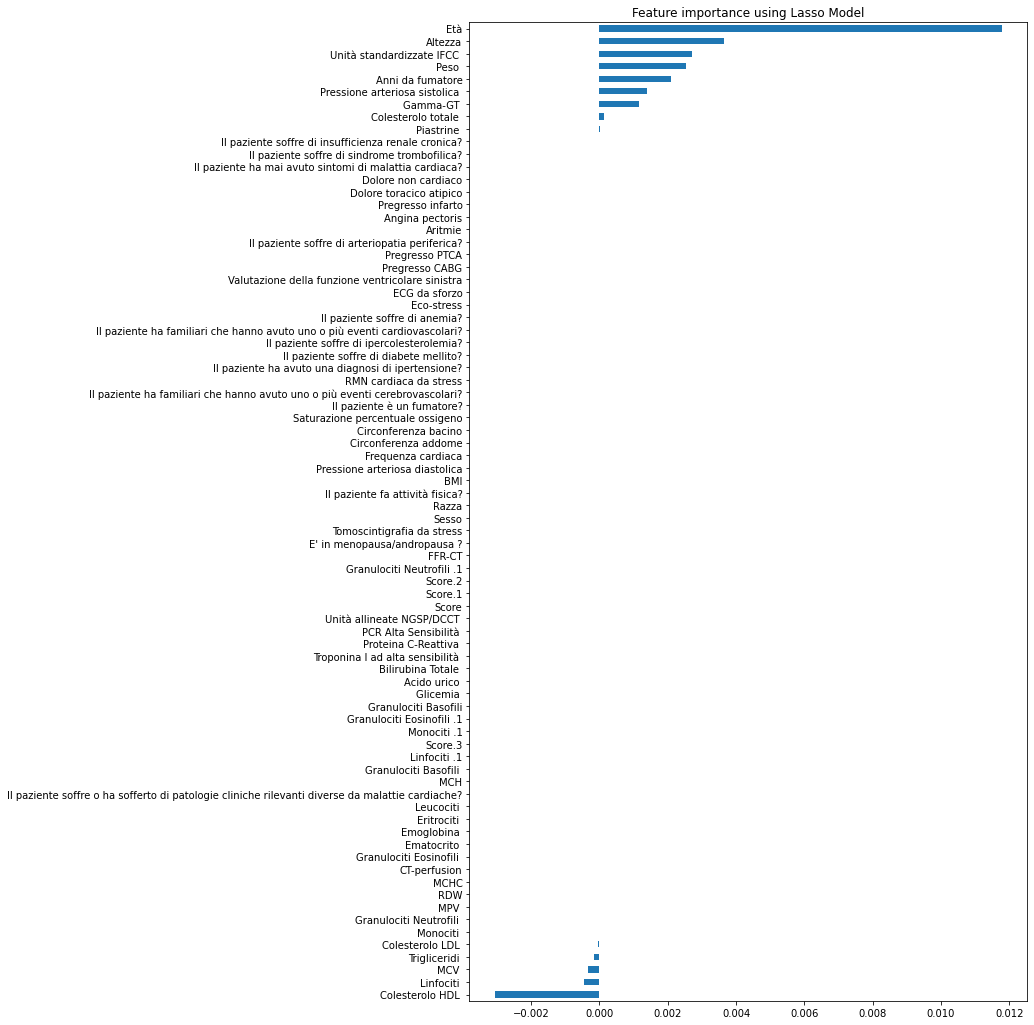

In [10]:
#Features Importance: vado a selezionare quelle features che sono importanti al fine di discrimanare la classe
del db["Trattamento Ipertensione"]

reg = LassoCV()
reg.fit(db.values, target)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(db.values, target))
coef = pd.Series(reg.coef_, index = db.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (10.0, 18.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [11]:
col_selected  = coef.loc[coef != 0]
col_selected  = col_selected.keys().tolist()

#Estraggo il mio subset dal dataset iniziale
db_selected = db[col_selected]

#Scalo il mio dataset 
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
db_selected_1 = db_selected.copy() 
X = db_selected_1.values #trasformo il dataframe in una matrix
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

db_scaled = pd.DataFrame(X_scaled, columns = db_selected.columns)

A questo punto affinchè giotto-tda possa lavorare necessita di una point cloud 3D. Ciò che si potrebbe fare è 
andare a restringere lo spazio del dataset in uno spazio 3D tramite l'applicazione di un filtro.
Scelgo come funzione filtro il Tsne 3D

In [12]:
db["Class"] = target

training_data = db.sample(frac=0.7, random_state=2556)
testing_data = db.drop(training_data.index)

train_target = training_data["Class"]
del training_data["Class"]

test_target = testing_data["Class"]
del testing_data["Class"]

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 576
No. of testing examples: 247


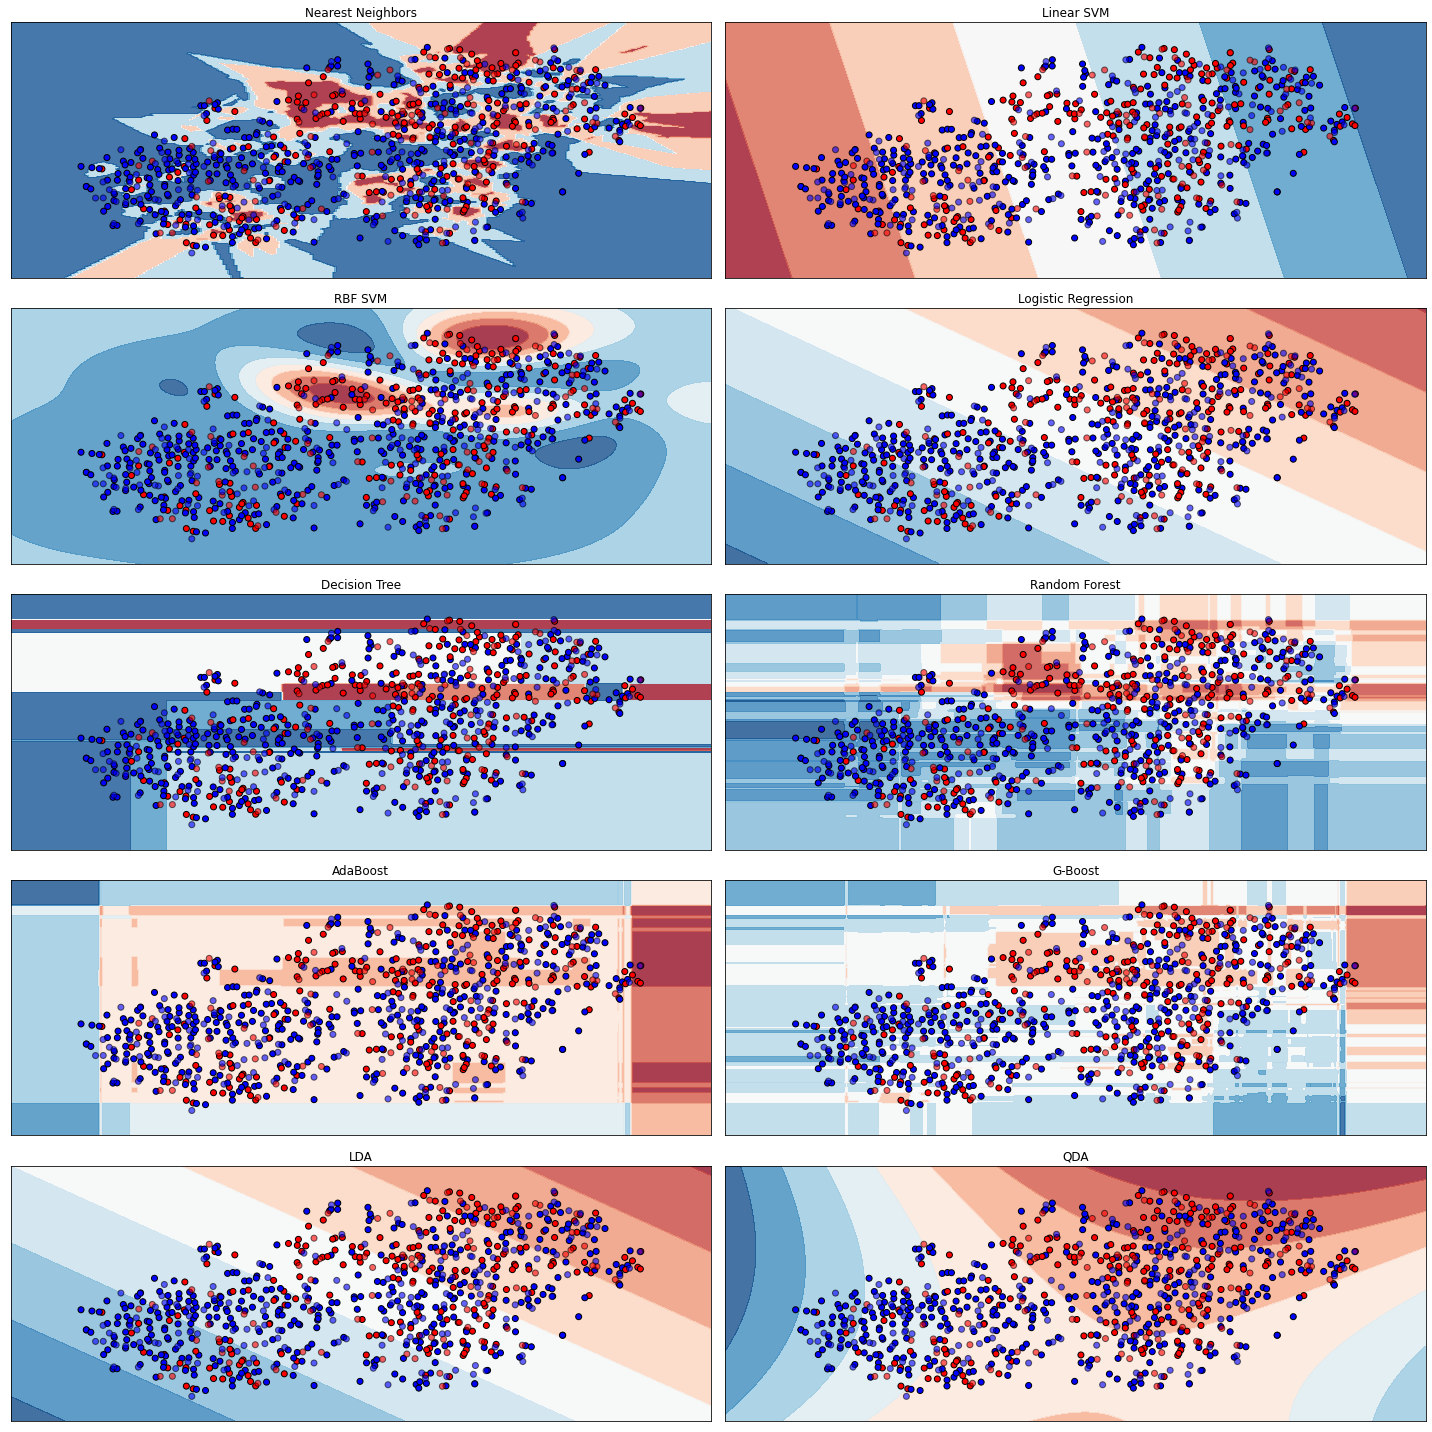

In [17]:
#Testo i diversi classificatori
h = 0.02  # step size in the mesh
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "G-Boost",
    "LDA",
    "QDA",
]

lens = sklearn.manifold.TSNE(n_components=2)
X = lens.fit_transform(db_scaled)
y = target
print_decision_boundary(names,h, lens, X, y)

In [19]:
#Calcolo alcune misure di performance sui diversi classificatori
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "G-Boost",
    "LDA",
    "QDA",
]

db = db_scaled.copy()
ModelliBase = evaluation_model(db, names, classifiers)

A questo punto aggiungo l'informazione delle communities trovate dal TDA, poi quelle del rischio ed infine tutte e due

In [22]:
#Aggiungo informazione proveniente dal progetto cuoro ---> Risk Score
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "G-Boost",
    "LDA",
    "QDA + Score Rischio"]

db = db_scaled.copy()
db["Risk_score"] = patient_coef['Risk_score']
Modelli_Risk = evaluation_model(db, names, classifiers)

In [23]:
Modelli_Risk

,Classificatore,Accuratezza,F_score,Precision,Recall,AUC,Sens,Spec,PPV,NPV
0,Nearest Neighbors,0.635628,0.733728,0.716763,0.751515,0.576977,0.445946,0.716763,0.402439,0.751515
1,Linear SVM,0.668016,0.800971,0.668016,1.000000,0.500000,NaN,0.668016,0.000000,1.000000
2,RBF SVM,0.688259,0.785515,0.726804,0.854545,0.604102,0.547170,0.726804,0.353659,0.854545
3,Logistic Regression,0.684211,0.783333,0.723077,0.854545,0.598004,0.538462,0.723077,0.341463,0.854545
4,Decision Tree,0.680162,0.766962,0.747126,0.787879,0.625647,0.520548,0.747126,0.463415,0.787879
5,Random Forest,0.65587,0.773333,0.690476,0.878788,0.543052,0.459459,0.690476,0.207317,0.878788
6,AdaBoost,0.643725,0.726708,0.745223,0.709091,0.610643,0.466667,0.745223,0.512195,0.709091
7,G-Boost,0.676113,0.761905,0.748538,0.775758,0.625684,0.513158,0.748538,0.475610,0.775758
8,LDA,0.684211,0.779661,0.730159,0.836364,0.607206,0.534483,0.730159,0.378049,0.836364
9,QDA + Score Rischio,0.700405,0.814070,0.695279,0.981818,0.557982,0.785714,0.695279,0.134146,0.981818


In [133]:
#Aggiungo ai dati l'informazione proveniente dalla TDA ---> appartenenza Communities
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "G-Boost",
    "LDA",
    "QDA + output TDA",
]

db = db_scaled.copy()

df_comm = pd.read_csv("File Memory/dataframe_Communities.csv")
dummy_comm = pd.get_dummies(df_comm["Communities"])
db[dummy_comm.columns.to_list()] = dummy_comm.values
Modelli_outputTDA = evaluation_model(db, names, classifiers)

In [134]:
#Aggiungo informazione proveniente dalla TDA ---> appartenenza Communities
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "G-Boost",
    "LDA",
    "QDA + output TDA + Score Rischio",
]

db = db_scaled.copy()
df_comm = pd.read_csv("dataframe_Communities.csv")
dummy_comm = pd.get_dummies(df_comm["Communities"])

db["Risk_score"] = patient_coef['Risk_score']
db[dummy_comm.columns.to_list()] = dummy_comm.values
Modelli_total = evaluation_model(db, names, classifiers) 

Dai classificatori utilizzati nel modello base risulta il QDA il migliore. A questo punto confronto questo con il caso in cui aggiungo solo il punteggio rischio e quello in cui inserisco l'output della TDA.

In [100]:

#Esegui il test di McNemar 
#Confronto modello base con quello per il rischio
def do_mcnemarTest(y_predModel1, y_predModel2):
    PP = 0
    NN = 0
    FN = 0
    FP = 0

    for i in range(0,len(y_predModel1)):
        if y_predModel1[i] == 1.0 and y_predModel2[i]==1.0:
                PP = PP + 1
        if y_predModel1[i] == 1.0 and y_predModel2[i]==0.0:
                FN = FN + 1
        if y_predModel1[i] == 0.0 and y_predModel2[i]==0.0:
                NN = NN + 1
        if y_predModel1[i] == 0.0 and y_predModel2[i]==1.0:
                FP = FP + 1
    
    table = [[PP, FN],[FP, NN]]
            
    return table

result = mcnemar(do_mcnemarTest(y_pred_base,y_pred_risk), exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')
    
result = mcnemar(do_mcnemarTest(y_pred_base,y_pred_tda), exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')
    
result = mcnemar(do_mcnemarTest(y_pred_base,y_pred_tda_risk), exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')
 

statistic=1.000, p-value=0.375
Same proportions of errors (fail to reject H0)
statistic=2.000, p-value=0.289
Same proportions of errors (fail to reject H0)
statistic=3.000, p-value=0.000
Different proportions of errors (reject H0)


In [110]:
result = mcnemar(do_mcnemarTest(y_pred_tda,y_pred_tda_risk), exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')

statistic=2.000, p-value=0.001
Different proportions of errors (reject H0)
